In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img_s = cv2.imread('/content/drive/MyDrive/DA Image/Training/0/A15.jpg')

In [5]:
img_s.shape

(268, 188, 3)

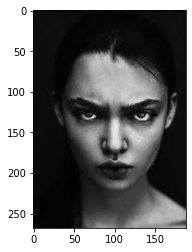

In [6]:
plt.imshow(img_s)

In [7]:
data_directory = '/content/drive/MyDrive/DA Image/Training'

In [8]:
classes = ['0', '1', '2', '3', '4', '5']

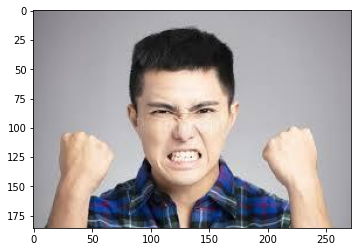

In [9]:
for category in classes:
  path = os.path.join(data_directory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

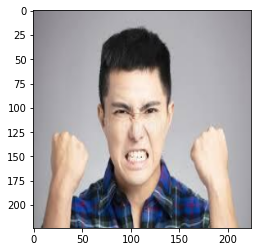

In [10]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
training_data = []

def create_training_data():
  for category in classes:
    path = os.path.join(data_directory, category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [13]:
create_training_data()

In [14]:
print(len(training_data))

828


In [15]:
temp = np.array(training_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [16]:
temp.shape

(828, 2)

In [17]:
import random

random.shuffle(training_data)

In [18]:
x = [] #data/feature
y = [] #label

for features, label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3) 
#converting it into 4 dimension as MobileNet (or, any deep learning module like CNN maintains the 4 dimension.)

In [19]:
x.shape

(828, 224, 224, 3)

In [20]:
x = x/255.0 #normalizing the image

In [21]:
y[10]

0

**Deep Learning Model for Training - Transfer Learning**

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

**Tuning**

In [25]:
base_input = model.layers[0].input

In [26]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
#adding new layer, after the output of global pooling layer
final_output = layers.Dense(128)(base_output)
final_output_a = layers.Activation('relu')(final_output) #activation function
final_output = layers.Dense(64)(final_output_a)
final_output_a = layers.Activation('relu')(final_output)
final_output = layers.Dense(6, activation='softmax')(final_output_a) #6 classification layer

In [30]:
final_output

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

**Settings for Binary Classification**

In [33]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [34]:
x = np.array(x)

In [35]:
y = np.array(y)

In [36]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#train/test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
new_model.fit(X_train,Y_train, epochs=15)

Epoch 1/15
21/21 [==============================] - 116s 5s/step - loss: 0.0562 - accuracy: 0.9864
Epoch 2/15
21/21 [==============================] - 113s 5s/step - loss: 0.0936 - accuracy: 0.9728
Epoch 3/15
21/21 [==============================] - 114s 5s/step - loss: 0.1495 - accuracy: 0.9502
Epoch 4/15
21/21 [==============================] - 114s 5s/step - loss: 0.1472 - accuracy: 0.9577
Epoch 5/15
21/21 [==============================] - 113s 5s/step - loss: 0.1504 - accuracy: 0.9607
Epoch 6/15
21/21 [==============================] - 113s 5s/step - loss: 0.0996 - accuracy: 0.9758
Epoch 7/15
21/21 [==============================] - 113s 5s/step - loss: 0.0697 - accuracy: 0.9804
Epoch 8/15
21/21 [==============================] - 113s 5s/step - loss: 0.0391 - accuracy: 0.9849
Epoch 9/15
21/21 [==============================] - 113s 5s/step - loss: 0.0338 - accuracy: 0.9909
Epoch 10/15
21/21 [==============================] - 113s 5s/step - loss: 0.0302 - accuracy: 0.9909
Epoch 11/

In [76]:
new_model.save('face_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [78]:
predictions = new_model.predict(X_test).argmax(axis=1)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.3674698795180723
[[ 4  0  4  0  2 12]
 [ 0 14  0 13  0  9]
 [ 0  1  4  1  0  8]
 [ 0 13  2  5  1 11]
 [ 3  0  7  1  3 15]
 [ 0  0  2  0  0 31]]
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.50      0.39      0.44        36
           2       0.21      0.29      0.24        14
           3       0.25      0.16      0.19        32
           4       0.50      0.10      0.17        29
           5       0.36      0.94      0.52        33

    accuracy                           0.37       166
   macro avg       0.40      0.34      0.31       166
weighted avg       0.41      0.37      0.32       166



In [79]:
new_model= tf.keras.models.load_model('face_model.h5')

In [80]:
# save best weights
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

In [81]:
frame = cv2.imread('/content/drive/MyDrive/DA Project Images/test_i.jpg')

In [82]:
frame.shape

(840, 660, 3)

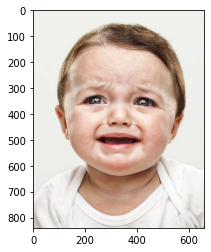

In [83]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [84]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [85]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [86]:
gray.shape

(840, 660)

In [87]:
faces = face_cascade.detectMultiScale(gray, 1.3,4)

for x,y,w,h in faces:
  roi_gray = gray[y: y+h, x: x+w]
  roi_color = frame[y: y+h, x: x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2) #BGR Value
  faces = face_cascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print('Face not detected.')
  else:
    for (ex,ey,ew,eh) in faces:
      face_roi = roi_color[ey: ey+eh, ex: ex+ew]

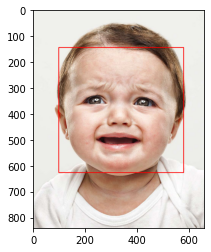

In [88]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

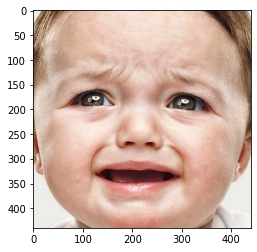

In [89]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [90]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)   # Need 4th dimension
final_image = final_image/255.0     # Normalizing the image

In [91]:
prediction = new_model.predict(final_image)

In [92]:
prediction[0]

array([1.62364056e-09, 4.71690356e-07, 9.96064365e-01, 1.51810020e-09,
       1.18096895e-11, 3.93520901e-03], dtype=float32)

In [93]:
np.argmax(prediction)

2